# Social Network

In [1]:
dmatrix = as.matrix(read.csv(url("https://raw.githubusercontent.com/ryanraaum/bioanth-datasets/master/raw/networkgroom.csv"), row.names=1))

## igraph

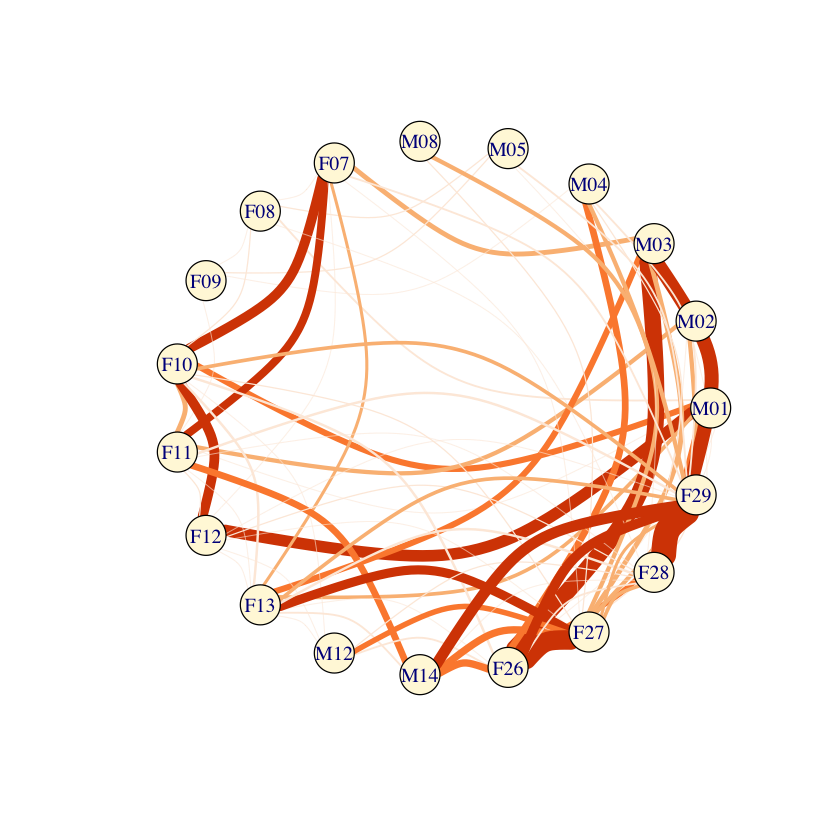

In [20]:
library(igraph)

g = graph.adjacency(dmatrix, mode="undirected", weighted=TRUE)

ecolor_map = function(x) {
    if (x < 0.1) {return("#FDEBDD")}
    else if (x >= 0.1 & x < 0.2) {return("#FBBD84")}
    else if (x >= 0.2 & x < 0.3) {return("#FC8B3B")}
    return("#D74701")
}

ecolors = sapply(E(g)$weight, ecolor_map)

#plot(g, layout=layout_with_fr(g, weight=1/E(g)$weight), 
plot(g, layout=layout_in_circle, 
        edge.width=20*E(g)$weight, 
        edge.curved=T, 
        edge.color=ecolors,
        vertex.color='cornsilk')

## statnet

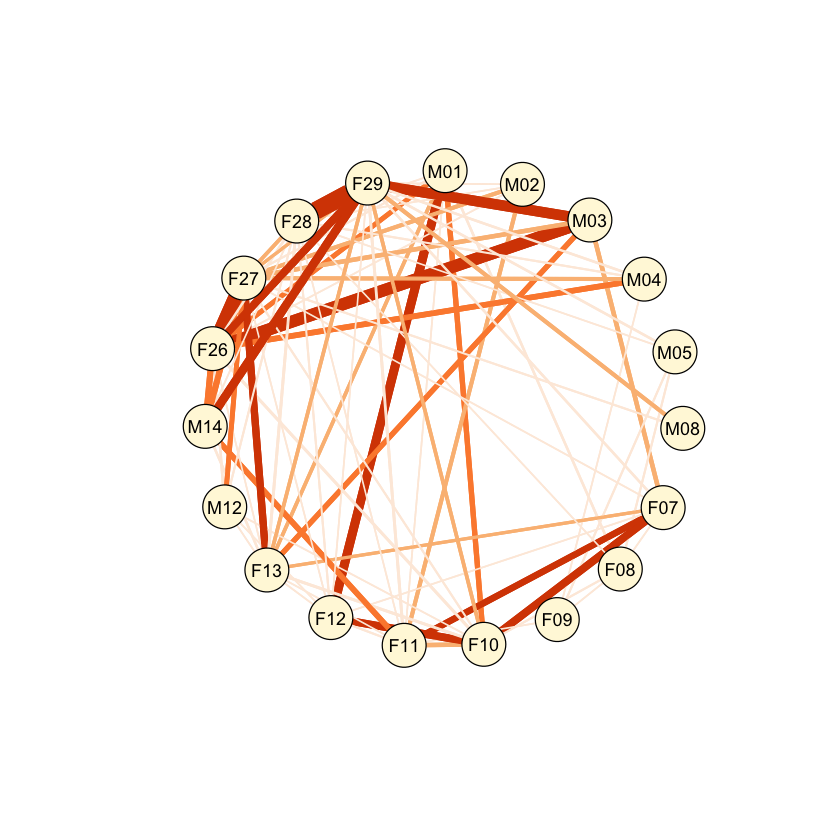

In [22]:
library(statnet)

net = network(dmatrix, matrix.type="adjacency", directed=F, ignore.eval=FALSE,names.eval="value")

gplot(net, gmode="graph", 
           mode="circle", 
           vertex.cex=2,
           vertex.col='cornsilk',
           label=net %v% 'vertex.names',
           label.pos=5,
           label.cex=0.9,
           edge.lwd=net%e%'value' * 15,
           edge.col=ecolors,
           usecurve=F)